In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv


In [2]:
df=pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

In [3]:
df.shape

(60000, 785)

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X=df.iloc[:,1:].values

In [6]:
y=df.iloc[:,0].values

In [7]:
import matplotlib.pyplot as plt

In [8]:
a=X[0].reshape(28,28)

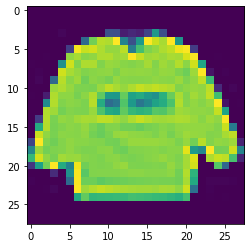

In [9]:
plt.imshow(a)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
clf=KNeighborsClassifier(n_neighbors=5)

In [14]:
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred=clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8535833333333334

In [17]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#Apply PCA

from sklearn.decomposition import PCA
pca=PCA(n_components=200)
X_train_new = pca.fit_transform(X_train)
X_test_new=pca.transform(X_test)

In [19]:
print(X_train.shape)
print(X_train_new.shape)

(48000, 784)
(48000, 200)


In [20]:
pca.explained_variance_ratio_

array([0.22092446, 0.14369276, 0.05434973, 0.05134495, 0.04075965,
       0.02997607, 0.0275047 , 0.02334357, 0.01683058, 0.01298132,
       0.01162907, 0.00967148, 0.00892165, 0.00859394, 0.00748959,
       0.00732713, 0.00653418, 0.00634028, 0.00623968, 0.00581961,
       0.00526191, 0.00514587, 0.00475556, 0.00453549, 0.00444305,
       0.00415436, 0.00404297, 0.00394533, 0.00381392, 0.00374693,
       0.00369187, 0.00354993, 0.00336349, 0.0033264 , 0.00329252,
       0.00320287, 0.00305598, 0.00293609, 0.00290452, 0.0028307 ,
       0.00271674, 0.00266376, 0.00257595, 0.0025412 , 0.00249124,
       0.00244763, 0.00237437, 0.00227351, 0.00223377, 0.00216917,
       0.00211461, 0.00207101, 0.00202703, 0.00200771, 0.00199263,
       0.00194898, 0.0019207 , 0.00184784, 0.00182029, 0.00177369,
       0.00174565, 0.00172805, 0.00171224, 0.00167677, 0.00160717,
       0.00157291, 0.00153725, 0.00151452, 0.00148935, 0.00146602,
       0.00144184, 0.00142954, 0.00141099, 0.00138845, 0.00137

**So by taking all the features, It took alot of time to run and gave 85% accuracy**

**Now, we will do the same thing but will take top 200 features on which the y label exactly depends** 

In [21]:
clf.fit(X_train_new,y_train)

KNeighborsClassifier()

In [22]:
y_pred_new = clf.predict(X_test_new)

In [23]:
accuracy_score(y_test,y_pred_new)

0.8646666666666667

**We get almost the same kind of accuracy. And hence the beauty of PCA. But taking all the features it gave 85% accuracy with a lot of run time. And with top 100 features that determines the label, it gave 86.2% accuracy**

**We can get the optimum feature of the model by running through a loop from 1-785.**

*Note: I wont do do this step in this notebook, it will take a lot of time*